In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.



ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'data'

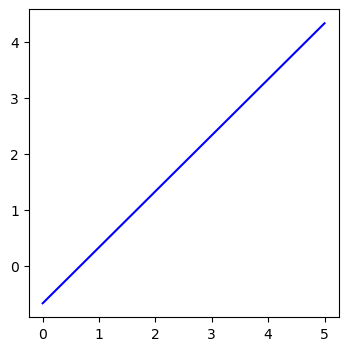

In [4]:
np.random.seed(0) # Apparently this sets the random to be not so random anymore

# This is for the spliting line function
n_items = 500
b0 = 2
b1 = -3
b2 = 3

# Create the data
x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]

# the following is for the linespace representation of the line in the plot
x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

# Fit the data in the dataframe and make the class column (1 if above the line, 0 otherwise
TP3_1 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'Class': [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else -1 for i in range(n_items)]
})

# Create a train test split
train, test = train_test_split(TP3_1, test_size=0.25, random_state=38)

X_train = train[['x1', 'x2']].values
y_train = train['Class'].values

X_test = test[['x1', 'x2']].values
y_test = test['Class'].values



def ploting(data, b0=b0, b1=b1, b2=b2, line=True):

    #For the line in the plot
    if line:
        x1_for_line = np.linspace(0, 5, 100)
        x2_for_line = (-b0 - b1 * x1_for_line) / b2

    plt.figure(figsize=(4, 4))
    plt.plot(x1_for_line, x2_for_line, label=f'{b0} + {b1}x1 + {b2}x2', color='blue')
    # plt.scatter(data_X['x1'], data_X['x2'], label='Data', c=data_y['Class'], marker='o')

    plt.scatter(data['x1'], data['x2'], label='Data', c='data', marker='o')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    # plt.legend()
    plt.show()

ploting(train, b0, b1, b2)


In [ ]:
print(y_train, "\n\n", y_test)
print(f"\nLen total = {len(TP3_1)}, len train = {len(train)}, len test = {len(test)}\n")

[-1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1
 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1
 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1
 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1
  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1
  1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1
 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1
 -1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1

Data in [0,5]x[0,5] is created. Green is above the line, red below. The blue line is the seperator as defined by b0 = -2, b1 = -3, b2 = 3 for b0 + b1x1 + b2x2

In [ ]:
# perceptron
def perceptron_train(X, y, learning_rate=0.1, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = 0
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

In [7]:
# Just do everythin into a def so that we can change stuff to show multiple plots

def perform_perceptron(epochs=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):

    weights, bias = perceptron_train(X_train, y_train, learning_rate=0.1, n_epochs=epochs)

    ic('1: ', len(X_train) + len(X_test))

    plt.figure(figsize=(6, 5))
    # plt.plot(x1_for_line, x2_for_line, label=f'{b0} + {b1}x1 + {b2}x2 = 0', color='blue')
    plt.scatter(train['x1'], train['x2'], label='Data', c=train['Class'], marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)

    # Make predictions on the test set (X_test)
    y_pred = np.dot(X_test, weights) + bias
    y_pred = (y_pred > 0).astype(int)  # Convert to 1 if prediction is > 0, else 0

    # Calculate the classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(report)

    # For the boundary line
    x_boundary = np.linspace(0, 5, 100)
    y_boundary = (-weights[0] * x_boundary - bias) / weights[1]
    plt.plot(x_boundary, y_boundary, label='Perceptron Decision Boundary', color='green', linestyle='--')

    plt.legend()
    plt.show()

    return weights, bias, X_train, y_train, X_test, y_test


ic| '1: ', len(X_train) + len(X_test): 500
/Users/stig/opt/miniconda3/envs/gpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stig/opt/miniconda3/envs/gpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stig/opt/miniconda3/envs/gpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        44
           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69        81

    accuracy                           0.34       125
   macro avg       0.33      0.18      0.23       125
weighted avg       0.65      0.34      0.45       125



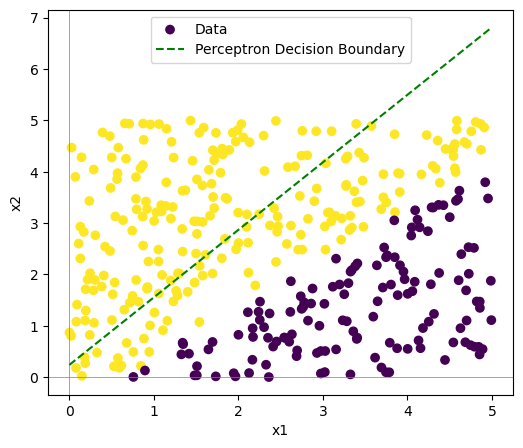

ic| len(X_train) + len(X_test): 500


[-1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1
 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1
 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1
 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1
  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1
  1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1
 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1
 -1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1

In [ ]:
_, _, X_train, y_train, X_test, y_test = perform_perceptron(epochs=100)

ic(len(X_train) + len(X_test))

print(y_train, "\n\n", y_test)
print(f"\nLen total = {len(TP3_1)}, len train = {len(train)}, len test = {len(test)}\n")



### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

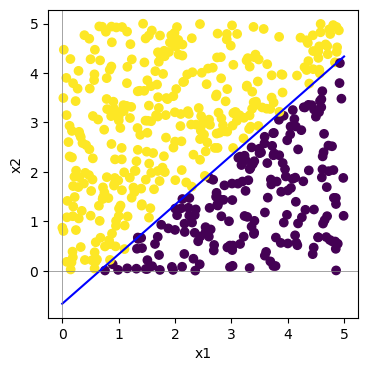

[ 1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1
  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1
 -1  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1
  1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1  1
 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1
  1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1
  1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1
  1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1  1
  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1
 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1
 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1

In [ ]:
TP3_2 = TP3_1.copy()

len(TP3_1)

n_additional_points = 100
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 1 (within 1 unit from the hyperplane)
    if distance <= 0.5:
        # Determine the class based on the hyperplane
        class_label = 1 if (b0 + b1 * x1_new + b2 * x2_new) > 0 else -1
        
        # Append the new data point to the list as a dictionary
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'Class': (class_label)}) # for some reason it does it oposite so -1 to fix

# Convert the list of dictionaries into a DataFrame and concat to TP3_1
additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=False)

ploting(TP3_2)

 



print(y_train, "\n\n", y_test)
print(f"\nLen total = {len(TP3_1)}, len train = {len(train)}, len test = {len(test)}\n")

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).


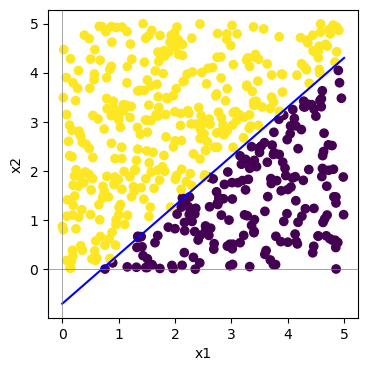

In [ ]:
epochs = 10

b0 = 0.7
b1 = -1
b2 = 1

for i in range(epochs):
    sum_fx = 0 # starting off

    for x1, x2 in zip(TP3_2['x1'], TP3_2['x2']):        
        sum_fx += (b0 + b1 * x1 + b2 * x2)  # sum of all the fx
        

ploting(TP3_2, b0, b1, b2) 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

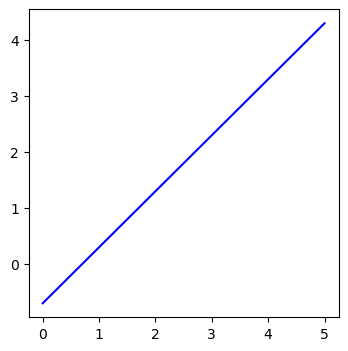

In [ ]:
X_train = TP3_2[['x1', 'x2']].values
y_train = TP3_2['Class'].values

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Hyperparameter: Learning rate
learning_rate = 0.1

# Number of epochs
epochs = 1

# Training loop
for epoch in range(epochs):
    for i, x in enumerate(X_train):
        # Calculate the margin (distance from data point to hyperplane)
        margin = y_train[i] * (np.dot(x, weights) + bias)

        # Update weights and bias if margin is less than 1 (misclassified)
        if margin < 1:
            weights += learning_rate * (y_train[i] * x)
            bias += learning_rate * y_train[i]

# The weights and bias now represent the hyperplane

# Classification
def classify(x):
    margin = np.dot(x, weights) + bias
    return 1 if margin > 0 else -1

ploting(X_train, y_train, b0, b1, b2, line=True)